In [25]:
import pandas as pd
import os
import numpy as np
import scipy.stats as stats
from itertools import compress
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [96]:
from Utilities import pdVarianceThreshold, pdSelectKBest

In [2]:
direc = "E:\\WS4PD_data"
os.chdir(direc)
save_path = os.path.join(direc, "Figures", "Data_exploration", "GENEActiv_tremor")

In [3]:
# Load score data
score_file_path = os.path.join(direc, 'Feature_extraction','score_by_device.pkl')
df_score = pd.read_pickle(score_file_path)

In [4]:
df_score.head(10)

,subject_id,visit,session,task_code,repetition,tremor_GENEActivHand,tremor_PebbleHand,dyskinesia_GENEActivHand,dyskinesia_PebbleHand,bradykinesia_GENEActivHand,bradykinesia_PebbleHand
0,3_BOS,1,1,stndg,1,0,0,Yes,Yes,NotApplicable,NotApplicable
1,3_BOS,1,1,wlkgs,1,0,0,Yes,Yes,No,No
2,3_BOS,1,1,wlkgc,1,0,0,Yes,Yes,No,No
3,3_BOS,1,1,strsu,1,0,0,Yes,No,No,No
4,3_BOS,1,1,strsd,1,0,0,No,Yes,No,No
5,3_BOS,1,1,wlkgp,1,0,0,Yes,Yes,Yes,No
6,3_BOS,1,1,drawg,1,1,0,No,Yes,No,No
7,3_BOS,1,1,ftnr,1,1,0,No,Yes,No,NotApplicable
8,3_BOS,1,1,ftnl,1,0,1,Yes,No,NotApplicable,No
9,3_BOS,1,1,ftnr,2,0,0,No,Yes,No,NotApplicable


In [81]:
# load clinical features
meta_file_path = os.path.join(direc, 'Feature_extraction','metadata_features.pkl')
df_meta = pd.read_pickle(meta_file_path)

# drop subject_id and task_code 
# df_meta.drop(columns = ['subject_id', 'task_code'])
df_meta = df_meta.drop(columns = 'subject_id')

# One-hot encoding clinical/ categorical features
categorical_columns = df_meta.columns
for column in categorical_columns:
    tempdf = pd.get_dummies(df_meta[column], prefix=column)
    df_meta = pd.merge(
        left=df_meta,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df_meta = df_meta.drop(columns=column)
print(df_meta.shape)
df_meta.head(5)

(6909, 69)


,visit_1,visit_2,session_1,session_2,session_3,session_4,session_5,session_6,session_7,session_8,...,freeze_of_gait_Yes,dyskinesia_No,dyskinesia_Yes,rigidity_No,rigidity_Yes,updrs_score_p1_group_0.0,updrs_score_p2_group_1.0,updrs_score_p3_group_2.0,updrs_score_p4_group_3.0,updrs_second_visit_score_p3_group_4.0
0,1,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,1
1,1,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,1
2,1,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,1
3,1,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,1
4,1,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,1


In [17]:
# load sensor feature data
subject_ids = df_score.subject_id.unique()
df_feature = pd.DataFrame()
device = 'GENEActiv'
for sb in subject_ids:
    feature_file_path = os.path.join(direc,'Feature_extraction',device,sb + '_features.pkl')
    df_feature_sb = pd.read_pickle(feature_file_path)
    df_feature = pd.concat([df_feature,df_feature_sb])
df_feature = df_feature.reset_index(drop=True)

# Is tremor

In [21]:
# Can wearable sensor data predict whether tremor is present?
is_tremor = df_score['tremor_GENEActivHand'].astype(int)>0
df_score['newTremorLabel_GENEActivHand'] = np.nan
df_score['newTremorLabel_GENEActivHand'].loc[is_tremor] = 1
df_score['newTremorLabel_GENEActivHand'].loc[~is_tremor] = 0

title_name = 'is tremor'
save_name = 'is_tremor'
xtick_name = [0,1]
bin_range = range(3)


array([4677, 2232], dtype=int64)

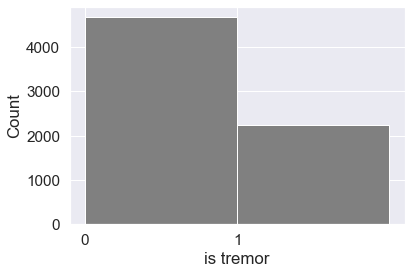

In [22]:
# Get new score distribution
score = df_score['newTremorLabel_GENEActivHand'].values
score = np.array(score, dtype=float)

# score distribution
counts, bin_edges = np.histogram(score,bins = bin_range)
fig, ax = plt.subplots()
ax.hist(score, bins = bin_range, histtype='bar', color = 'grey')
ax.set_xlabel(title_name)
ax.set_ylabel('Count')
ax.set_xticks(xtick_name)
# save figure
# plt.savefig(os.path.join(save_path,"Tremor_score_distribution"))
counts

In [38]:
# Removing columns with zero variance in a panda dataframe using sklearn- VarianceThreshold
def pdVarianceThreshold(df, varThreshold):
    sel = VarianceThreshold(threshold=varThreshold)
    new_df = sel.fit_transform(df)
    new_filter = sel.get_support()
    feature_names = df.columns
    new_feature_names = feature_names[new_filter]
    new_df = pd.DataFrame(new_df, columns=new_feature_names)
    return new_df

# Select columns with relevant features in a panda dataframe using sklearn- Univariate Selection
def pdSelectKBest(df, score, k_num):
    test = SelectKBest(score_func=f_classif, k=k_num)
    new_df = test.fit_transform(df, score)
    new_filter = test.get_support()
    feature_names = df.columns
    new_feature_names = feature_names[new_filter]
    new_df = pd.DataFrame(new_df, columns=new_feature_names)
    return new_df

In [82]:
varThreshold = 0.0001
df_meta2 = pdVarianceThreshold(df_meta,varThreshold)

In [92]:
k_num = 20
df_meta3 = pdSelectKBest(df_meta2,score,k_num)

In [93]:
df_meta3.columns

Index(['session_2', 'session_7', 'task_code_ftnr', 'task_group_1.0',
       'task_group_2.0', 'gender_Female', 'gender_Male', 'age_group_2.0',
       'age_group_3.0', 'age_diagnosis_group_1.0', 'age_diagnosis_group_2.0',
       'age_diagnosis_group_4.0', 'pd_most_affected_side_Left',
       'pd_most_affected_side_Right', 'tremor_No', 'tremor_Yes',
       'disrupted_sleep_No', 'disrupted_sleep_Yes', 'rigidity_No',
       'rigidity_Yes'],
      dtype='object')

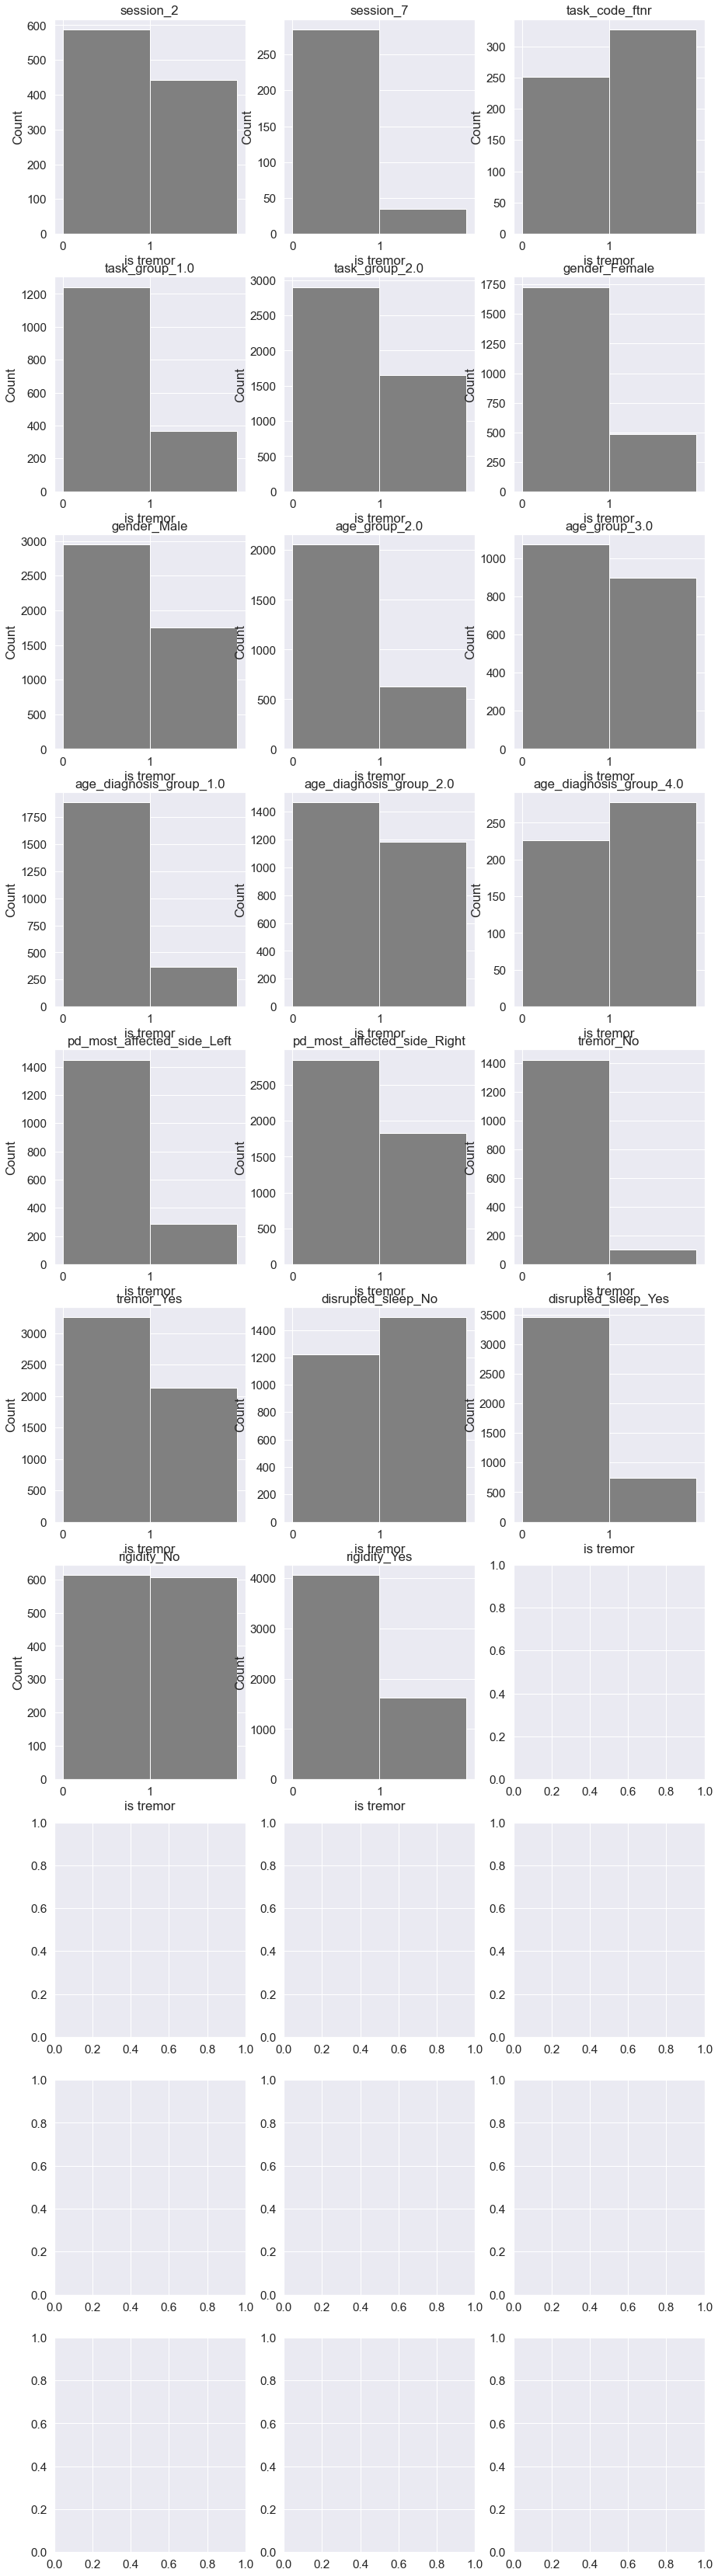

In [94]:
features = df_meta3.columns
fig, axes = plt.subplots(10,3, figsize=(15,60))
axes = axes.flatten()
for i, feature in enumerate(features):
    x = score[df_meta[feature]==1]
    axes[i].hist(x, histtype='bar', color = 'grey', bins = bin_range)
    axes[i].set_xlabel(title_name)
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(xtick_name)
    axes[i].set_title(feature)


# Tremor score

In [5]:
# Try different task categories
# task categories
task_groups = [['stndg', 'sittg', 'wlkgs', 'wlkgc', 'wlkgp', 'strsu', 'strsd', 'ststd',
              'ftnr', 'ftnl', 'ramr', 'raml', 'drawg', 'typng', 'ntblt', 'drnkg', 'orgpa', 'fldng'],
               ['stndg', 'sittg'],['wlkgs', 'wlkgc', 'wlkgp', 'strsu', 'strsd', 'ststd'],
               ['ftnr', 'ftnl', 'ramr', 'raml', 'drawg', 'typng', 'ntblt', 'drnkg', 'orgpa', 'fldng']]
task_group_names = ['all', 'no_voluntary_movement','lowerlimb_movement', 'upperlimb_movement']

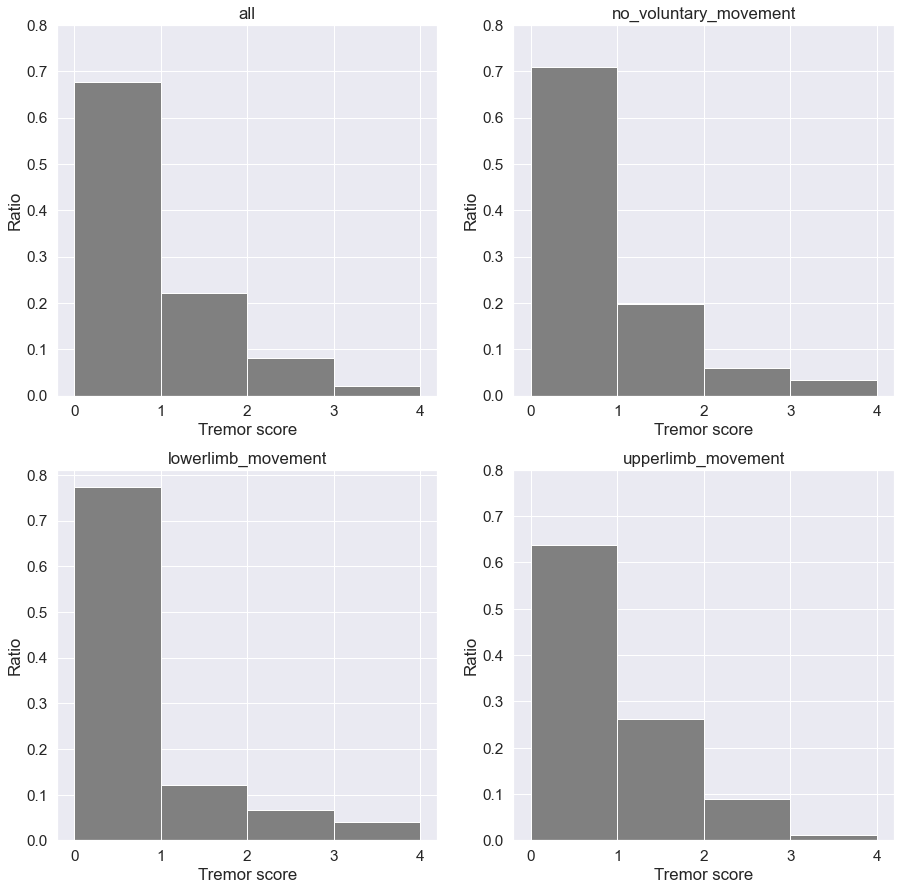

In [6]:
# Score distribution
score = df_score['tremor_GENEActivHand'].values
score = np.array(score, dtype=float)
fig, axes = plt.subplots(2,2, figsize=(15,15))
axes = axes.flatten()
for t,task,task_name in zip(range(len(task_groups)),task_groups, task_group_names):
    is_tasks = df_score['task_code'].isin(task).tolist()
    score_task = score[is_tasks]
    
    axes[t].hist(score_task, histtype='bar', color = 'grey', bins = range(5), density = True)
    axes[t].set_xlabel('Tremor score')
    axes[t].set_ylabel('Ratio')
    axes[t].set_yticks(np.arange(0,0.9,0.1))
    axes[t].set_xticks([0,1,2,3,4])
    axes[t].set_title(task_name)
    # save figure
    # plt.savefig(os.path.join(save_path,"Tremor_score_distribution"))

In [7]:
tasks = df_score['task_code'].unique()
len(tasks)

18

In [9]:
tasks

array(['stndg', 'wlkgs', 'wlkgc', 'strsu', 'strsd', 'wlkgp', 'drawg',
       'ftnr', 'ftnl', 'ramr', 'raml', 'ststd', 'typng', 'ntblt', 'drnkg',
       'orgpa', 'fldng', 'sittg'], dtype=object)

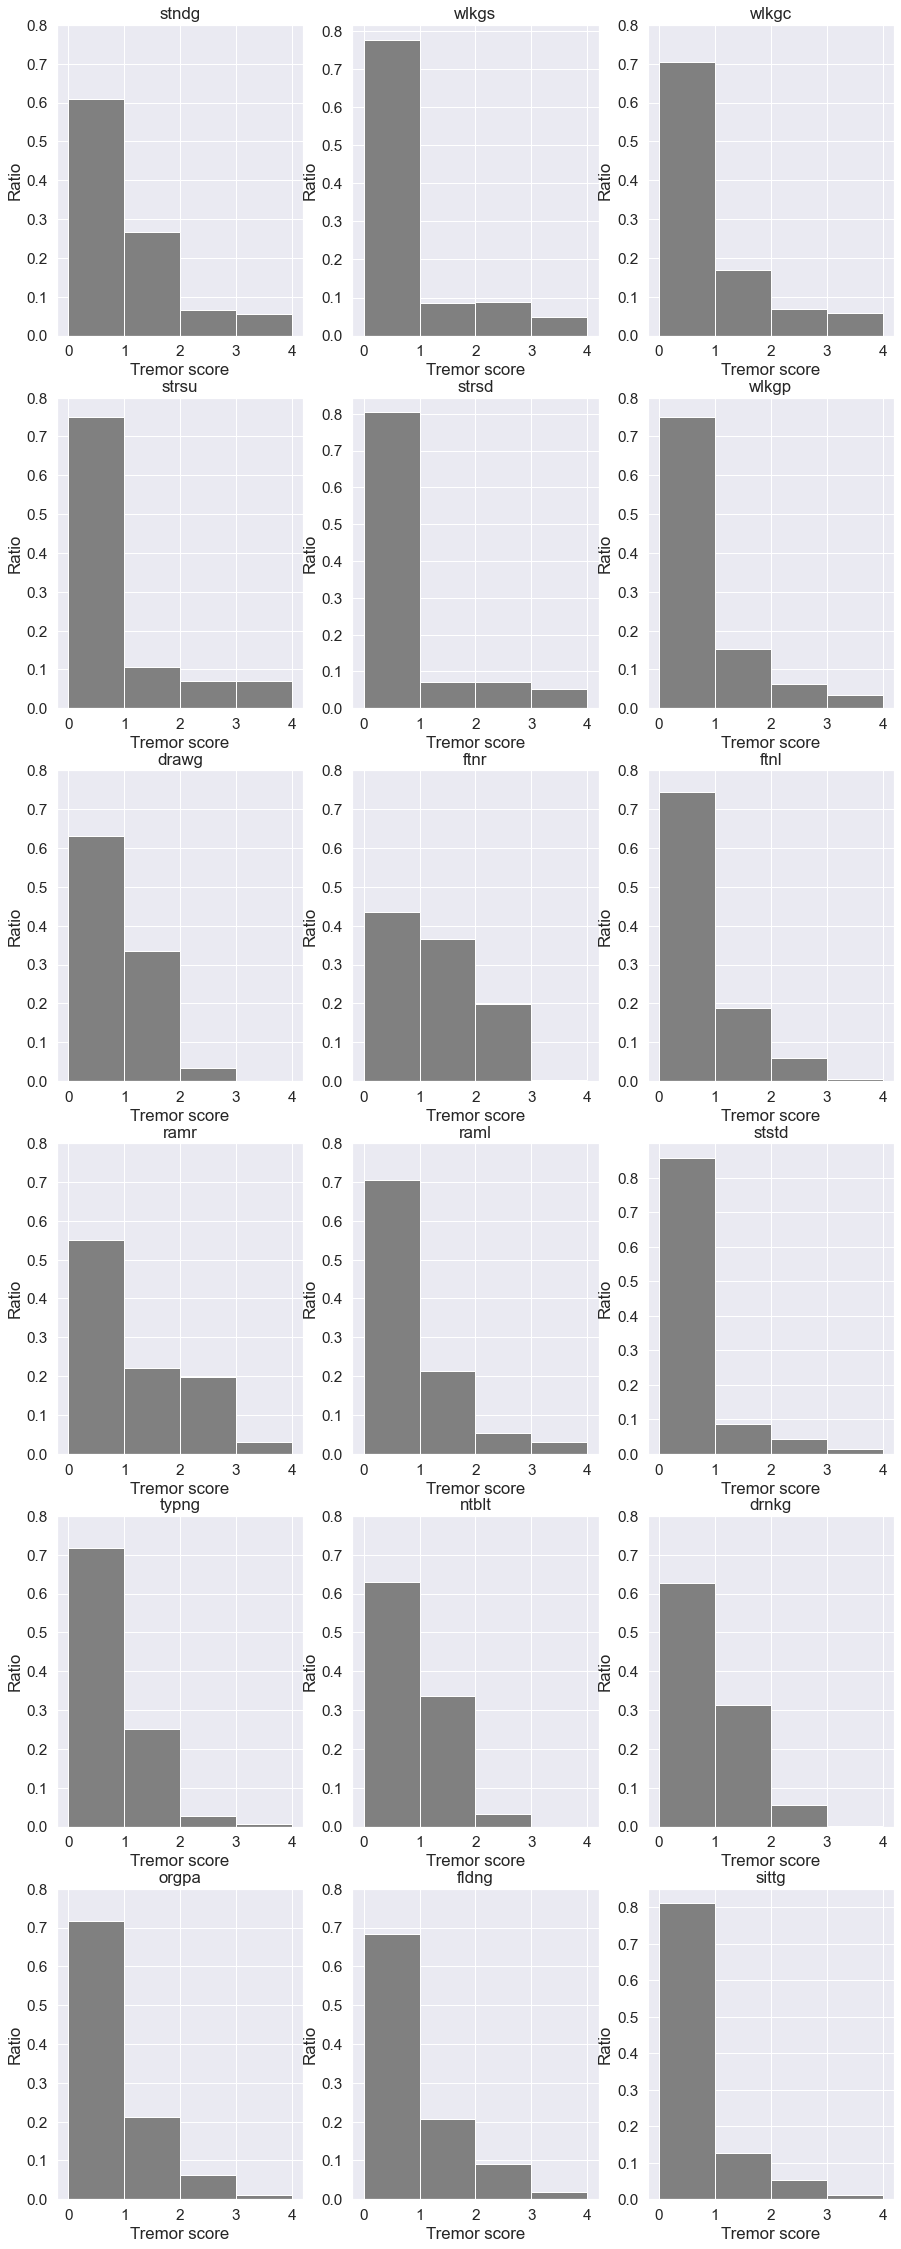

In [15]:
# Try different tasks
tasks = df_score['task_code'].unique()
fig, axes = plt.subplots(6,3, figsize=(15,40))
axes = axes.flatten()
for i, task in enumerate(tasks):
    is_tasks = df_score['task_code']==task
    score_task = score[is_tasks]
    
    axes[i].hist(score_task, histtype='bar', color = 'grey', bins = range(5), density = True)
    axes[i].set_xlabel('Tremor score')
    axes[i].set_ylabel('Ratio')
    axes[i].set_yticks(np.arange(0,0.9,0.1))
    axes[i].set_xticks([0,1,2,3,4])
    axes[i].set_title(task)